In [1]:
import numpy as np
import cmath
import IPython

from matplotlib import pyplot as plt
from matplotlib.pyplot import specgram
from scipy.io import wavfile
from scipy.signal import lfilter

In [2]:
def count_dft(tone):
    dft_arr = []
    for frame in tone:
        x_k = []
        for k in range(1024):
            x_dft = 0
            for n in range(320):
                x_dft += frame[n]*cmath.exp(-2j*cmath.pi*n*k/1024)
            x_k.append(x_dft)
        dft_arr.append(np.array(x_k))
    dft_arr = np.array(dft_arr)
    return dft_arr

In [3]:
def count_idft(freq_medium):
    my_impulse_response = []
    for n in range(512):
        idft_sum = 0
        for k in range(512):
            idft_sum += freq_medium[k]*cmath.exp(2j*cmath.pi*n*k/512)/512
        my_impulse_response.append(idft_sum)
    my_impulse_response = np.array(my_impulse_response)
    return my_impulse_response

In [4]:
fs_tone_on, data_tone_on = wavfile.read('../audio/maskon_tone.wav')
data_tone_on = data_tone_on[2000:(2000+16000)]
data_tone_on = data_tone_on / 2**15
tone_on = np.copy(data_tone_on)
tone_on -= np.mean(tone_on)
tone_on /= np.abs(tone_on).max()

In [5]:
fs_tone_off, data_tone_off = wavfile.read('../audio/maskoff_tone.wav')
data_tone_off = data_tone_off[2000:(2000+16000)]
data_tone_off = data_tone_off / 2**15
tone_off = np.copy(data_tone_off)
tone_off -= np.mean(tone_off)
tone_off /= np.abs(tone_off).max()

t_on = np.arange(tone_on.size) / fs_tone_on
plt.figure(figsize=(6,3))
plt.plot(t_on, tone_on)

# plt.gca() vraci handle na aktualni Axes objekt, 
# ktery nam umozni kontrolovat ruzne vlastnosti aktualniho grafu
# napr. popisy os
# viz https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes
plt.gca().set_xlabel('$t [s]$')
plt.gca().set_title('Tone signal: mask on')

plt.tight_layout()

t_off = np.arange(tone_off.size) / fs_tone_off
plt.figure(figsize=(6,3))
plt.plot(t_off, tone_off)

# plt.gca() vraci handle na aktualni Axes objekt, 
# ktery nam umozni kontrolovat ruzne vlastnosti aktualniho grafu
# napr. popisy os
# viz https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes
plt.gca().set_xlabel('$t [s]$')
plt.gca().set_title('Tone signal: mask off')

plt.tight_layout()

In [6]:
new_tone_on = []
for i in range(99):
    new_tone_on.append(tone_on[i*160:(i+2)*160]) # [i*0.01*16000 : (i+2)*0.01*16000]

#t_on = np.arange(new_tone_on.size) / fs_tone_on
plt.figure(figsize=(10,3))
plt.plot(np.arange(320)/16000, new_tone_on[5])

plt.gca().set_xlabel('$t [ms]$')
plt.gca().set_title('Sample #5: mask on')

plt.tight_layout()

In [7]:
new_tone_off = []
for i in range(99):
    new_tone_off.append(tone_off[i*160:(i+2)*160])

plt.figure(figsize=(10,3))
plt.plot(np.arange(320)/16000, new_tone_off[5])

plt.gca().set_xlabel('$t [ms]$')
plt.gca().set_title('Sample #5: mask off')
plt.tight_layout()



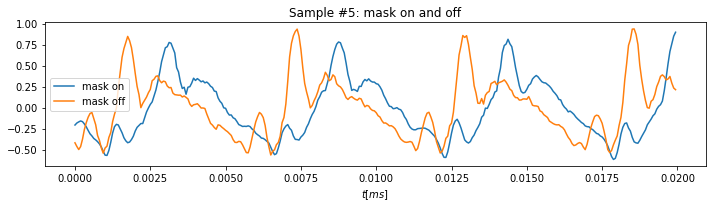

In [8]:
plt.figure(figsize=(10,3))
plt.plot(np.arange(320)/16000, new_tone_on[5], label='mask on')
plt.plot(np.arange(320)/16000, new_tone_off[5], label='mask off')
plt.legend()

plt.gca().set_xlabel('$t [ms]$')
plt.gca().set_title('Sample #5: mask on and off')
plt.tight_layout()

In [9]:
tone_off_4a = []
treshold = 0.63
treshold_off_max = tone_off.max() * treshold
treshold_off_min = -tone_off.max() * treshold
for i in range(16000):
    if tone_off[i] > treshold_off_max:
        tone_off_4a.append(1.0)
    elif tone_off[i] < treshold_off_min:
        tone_off_4a.append(-1.0)
    else:
        tone_off_4a.append(0.0)
            
tone_off_4a_frame = []
for i in range(99):
    tone_off_4a_frame.append(np.array(tone_off_4a[i*160:(i+2)*160]))

In [10]:
tone_on_4a = []
treshold_on_max = tone_on.max() * treshold
treshold_on_min = -tone_on.max() * treshold
for i in range(16000):
    if tone_on[i] > treshold_on_max:
        tone_on_4a.append(1.0)
    elif tone_on[i] < treshold_on_min:
        tone_on_4a.append(-1.0)
    else:
        tone_on_4a.append(0.0)
            
tone_on_4a_frame = []
for i in range(99):
     tone_on_4a_frame.append(np.array(tone_on_4a[i*160:(i+2)*160]))

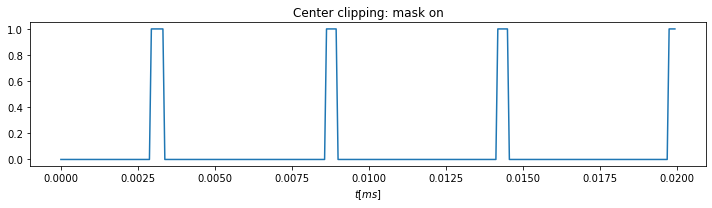

In [11]:
plt.figure(figsize=(10,3))
plt.plot(np.arange(320)/16000, tone_on_4a_frame[5])

plt.gca().set_xlabel('$t [ms]$')
plt.gca().set_title('Center clipping: mask on')
plt.tight_layout()

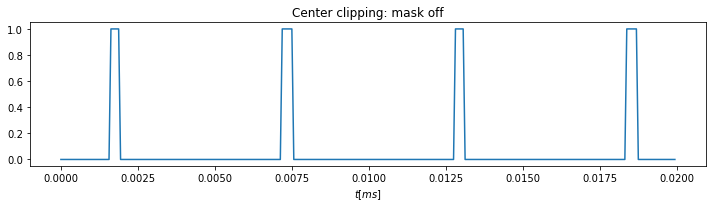

In [12]:
plt.figure(figsize=(10,3))
plt.plot(np.arange(320)/16000, tone_off_4a_frame[5])

plt.gca().set_xlabel('$t [ms]$')
plt.gca().set_title('Center clipping: mask off')
plt.tight_layout()

In [13]:
tone_on_4b = []

for frame in tone_on_4a_frame:
    frame_arr = []
    for lag in range(320):
        coef = 0
        for i in range(lag, 320-1):
            coef += frame[i]*frame[i-lag]
        frame_arr.append(coef)
    tone_on_4b.append(np.array(frame_arr))

tone_on_4b = np.array(tone_on_4b)

lags_mask_on = []
for frame in tone_on_4b:
    lags_mask_on.append(16000/np.argmax(frame[10:]))

In [14]:
tone_off_4b = []

for frame in tone_off_4a_frame:
    frame_arr = []
    for lag in range(320):
        coef = 0
        for i in range(lag, 320-1):
            coef += frame[i]*frame[i-lag]
        frame_arr.append(coef)
    tone_off_4b.append(np.array(frame_arr))
    
tone_off_4b = np.array(tone_off_4b)

lags_mask_off = []
for frame in tone_off_4b:
    lags_mask_off.append(16000/np.argmax(frame[10:]))

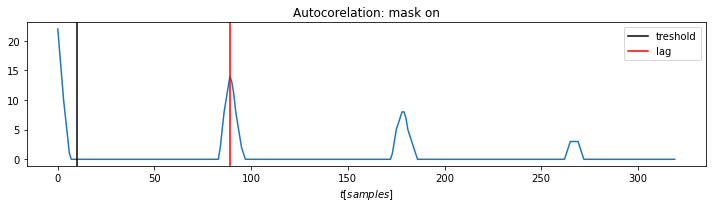

In [15]:
plt.figure(figsize=(10,3))
plt.plot(tone_on_4b[5])
plt.axvline(10, color='black', label='treshold')
plt.axvline(tone_on_4b[5][10:].argmax() + 10, color='r', label='lag')
plt.legend()

plt.gca().set_xlabel('$t [samples]$')
plt.gca().set_title('Autocorelation: mask on')
plt.tight_layout()

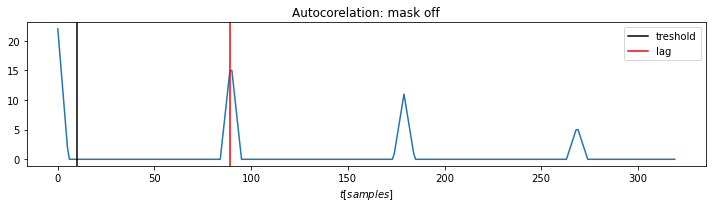

In [16]:
plt.figure(figsize=(10,3))
plt.plot(tone_off_4b[5])
plt.axvline(10, color='black', label='treshold')
plt.axvline(tone_off_4b[5][10:].argmax() + 10, color='r', label='lag')
plt.legend()

plt.gca().set_xlabel('$t [samples]$')
plt.gca().set_title('Autocorelation: mask off')
plt.tight_layout()

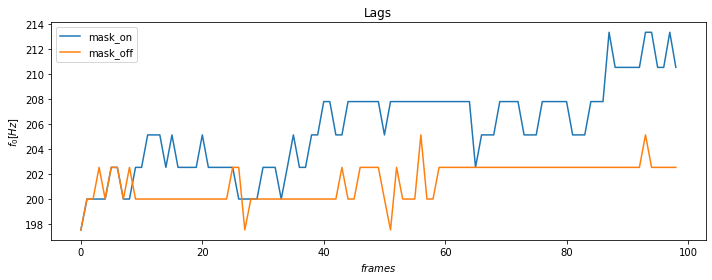

In [17]:
plt.figure(figsize=(10,4))
plt.plot(lags_mask_on, label='mask_on')
plt.plot(lags_mask_off, label='mask_off')
plt.legend()

plt.gca().set_xlabel('$frames$')
plt.gca().set_ylabel('$f_0 [Hz]$')
plt.gca().set_title('Lags')
plt.tight_layout()

In [18]:
print(np.mean(lags_mask_on), np.var(lags_mask_on))
print(np.mean(lags_mask_off), np.var(lags_mask_off))

205.61351967987724 12.21190170028492
201.33295885757204 2.2409738588289705


f_off, t_off, sgr_off = spectrogram(tone_off[:1024], 16000)
print(f_off, t_off)
#print(tone_off[:1024])
#print(sgr_off)
sgr_log_off = 10 * np.log10(sgr_off+1e-20) 
plt.figure(figsize=(10,6))
plt.pcolormesh(t_off, f_off, sgr_log_off, shading='gouraud')
plt.gca().set_title('Spectrogram mask off')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()

In [19]:
dft_on = []
for frame in new_tone_on:
    dft_on.append(np.fft.fft(frame, n=1024))
dft_on = np.array(dft_on)

dft_improved_on = 20 * np.log10(np.abs(dft_on)+1e-20)
plt.figure(figsize=(8,4))
plt.imshow(dft_improved_on[:,:512].transpose(), aspect='auto', extent=[0, 1, 0, 8000], origin='lower')
plt.gca().set_title('Spectrogram: mask on')
plt.gca().set_xlabel('t [s]')
plt.gca().set_ylabel('Frequency [Hz]')
plt.colorbar().set_label('Spectral power density [dB]', rotation=270, labelpad=15)
plt.tight_layout()

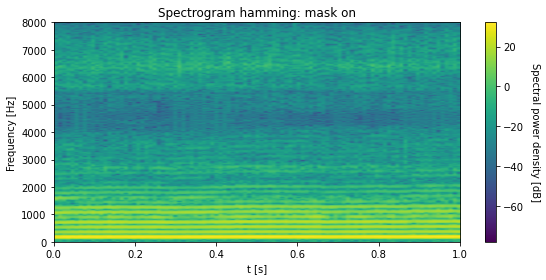

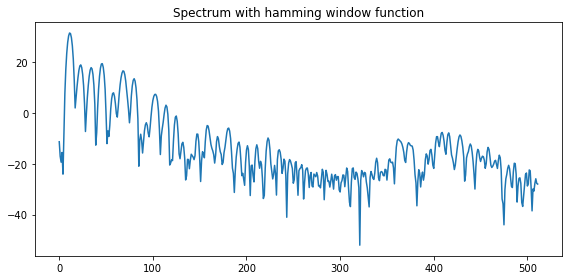

In [20]:
hamming = np.hamming(320)
plt.figure(figsize=(8,3))
plt.plot(hamming)

plt.gca().set_xlabel('$t [samples]$')
plt.gca().set_title('Hamming window function')
plt.tight_layout()

tone_on_hamming = np.empty(320)
tone_on_hamming = new_tone_on*hamming

hamming_dft_on = []
for frame in tone_on_hamming:
    hamming_dft_on.append(np.fft.fft(frame, n=1024))
hamming_dft_on = np.array(hamming_dft_on)

hamming_dft_improved_on = 20 * np.log10(np.abs(hamming_dft_on)+1e-20)
plt.figure(figsize=(8,4))
plt.imshow(hamming_dft_improved_on[:,:512].transpose(), aspect='auto', extent=[0, 1, 0, 8000], origin='lower')
plt.gca().set_title('Spectrogram hamming: mask on')
plt.gca().set_xlabel('t [s]')
plt.gca().set_ylabel('Frequency [Hz]')
plt.colorbar().set_label('Spectral power density [dB]', rotation=270, labelpad=15)
plt.tight_layout()

plt.figure(figsize=(8,4))
plt.plot(hamming_dft_improved_on[5][:512])
plt.gca().set_title('Spectrum with hamming window function')
plt.tight_layout()

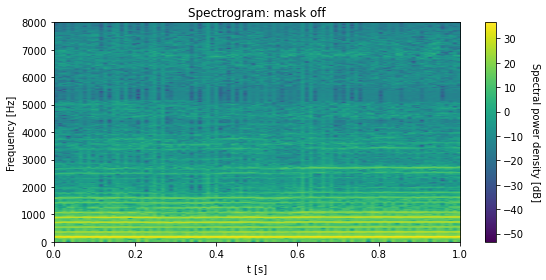

In [21]:
dft_off = []
for frame in new_tone_off:
    dft_off.append(np.fft.fft(frame, n=1024))
dft_off = np.array(dft_off)

dft_improved_off = 20 * np.log10(np.abs(dft_off)+1e-20)
plt.figure(figsize=(8,4))
plt.imshow(dft_improved_off[:,:512].transpose(), aspect='auto', extent=[0, 1, 0, 8000], origin='lower')
plt.gca().set_title('Spectrogram: mask off')
plt.gca().set_xlabel('t [s]')
plt.gca().set_ylabel('Frequency [Hz]')
plt.colorbar().set_label('Spectral power density [dB]', rotation=270, labelpad=15)
plt.tight_layout()

In [22]:
tone_off_hamming = np.empty(320)
tone_off_hamming = new_tone_off*hamming

hamming_dft_off = []
for frame in tone_off_hamming:
    hamming_dft_off.append(np.fft.fft(frame, n=1024))
hamming_dft_off = np.array(hamming_dft_off)

hamming_dft_improved_off = 20 * np.log10(np.abs(hamming_dft_off)+1e-20)
plt.figure(figsize=(8,4))
plt.imshow(hamming_dft_improved_off[:,:512].transpose(), aspect='auto', extent=[0, 1, 0, 8000], origin='lower')
plt.gca().set_title('Spectrogram hamming: mask off')
plt.gca().set_xlabel('t [s]')
plt.gca().set_ylabel('Frequency [Hz]')
plt.colorbar().set_label('Spectral power density [dB]', rotation=270, labelpad=15)
plt.tight_layout()

dft_my_off = count_dft(new_tone_off)
dft_improved_off = 20 * np.log10(np.abs(dft_my_off)+1e-20)
plt.figure(figsize=(10,5))
plt.imshow(dft_improved_off[:,:512].transpose(), aspect='auto', extent=[0, 1, 0, 8000], origin='lower')
plt.gca().set_title('Spectrogram: mask off')
plt.gca().set_xlabel('t [s]')
plt.gca().set_ylabel('Frequency [Hz]')
plt.colorbar().set_label('Spectral power density [dB]', rotation=270, labelpad=15)
plt.tight_layout()

In [23]:
#6
freq_charact = []
#plt.figure(figsize=(12,4))
for i in range(99):
    freq = dft_on[i, :512]/dft_off[i, :512]
    freq_charact.append(np.array(freq))
    #plt.plot(np.abs(imp_response))
    #plt.tight_layout()
freq_chraract = np.array(freq_charact)
freq_medium = np.empty(512)
freq_medium = np.mean(np.abs(freq_charact), axis=0)

freq_medium_improved = 20 * np.log10(np.abs(freq_medium)+1e-20)

plt.figure(figsize=(8,3))
plt.plot(freq_medium_improved)
plt.gca().set_title('Frequence characteristics $H(e^{j\omega})$')
plt.tight_layout()


In [24]:
hamming_freq_charact = []
for i in range(99):
    freq = hamming_dft_on[i, :512]/hamming_dft_off[i, :512]
    hamming_freq_charact.append(np.array(freq))
hamming_freq_chraract = np.array(hamming_freq_charact)

hamming_freq_medium = np.empty(512)
hamming_freq_medium = np.mean(np.abs(hamming_freq_charact), axis=0)

ham_freq_medium_improved = 20 * np.log10(np.abs(hamming_freq_medium)+1e-20)

plt.figure(figsize=(8,3))
plt.plot(ham_freq_medium_improved)
plt.gca().set_title('Frequence characteristics $H(e^{j\omega})$')
plt.tight_layout()

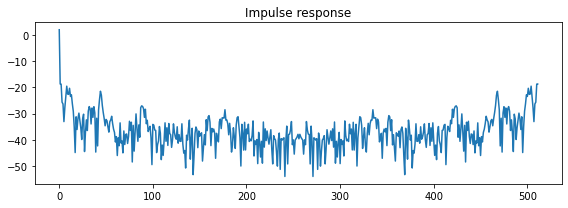

In [25]:
impulse_response = np.fft.ifft(freq_medium)

plt.figure(figsize=(8,3))
plt.plot(20 * np.log10(np.abs(impulse_response)+1e-20))
plt.gca().set_title('Impulse response')
plt.tight_layout()

In [26]:
hamming_impulse_response = np.fft.ifft(hamming_freq_medium)

plt.figure(figsize=(8,3))
plt.plot(20 * np.log10(np.abs(hamming_impulse_response)+1e-20))
plt.gca().set_title('Impulse response')
plt.tight_layout()

my_impulse_response = count_idft(freq_medium)
plt.plot(20 * np.log10(np.abs(my_impulse_response)+1e-20))
plt.tight_layout()

In [27]:
fs_sentence_on, data_sentence_on = wavfile.read('../audio/maskon_sentence.wav')
data_sentence_on = data_sentence_on / 2**15

sentence_on = np.copy(data_sentence_on)
sentence_on -= np.mean(sentence_on)
sentence_on /= np.abs(sentence_on).max()

In [28]:
fs_sentence_off, data_sentence_off = wavfile.read('../audio/maskoff_sentence.wav')
data_sentence_off = data_sentence_off / 2**15

sentence_off = np.copy(data_sentence_off)
sentence_off -= np.mean(sentence_off)
sentence_off /= np.abs(sentence_off).max()

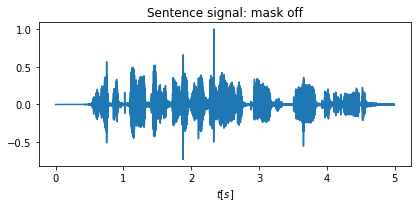

In [29]:
plt.figure(figsize=(6,3))
plt.plot(np.arange(sentence_on.size)/fs_sentence_on, sentence_on)
plt.gca().set_xlabel('$t [s]$')
plt.gca().set_title('Sentence signal: mask on')
plt.tight_layout()

plt.figure(figsize=(6,3))
plt.plot(np.arange(sentence_off.size)/fs_sentence_off, sentence_off)
plt.gca().set_xlabel('$t [s]$')
plt.gca().set_title('Sentence signal: mask off')
plt.tight_layout()

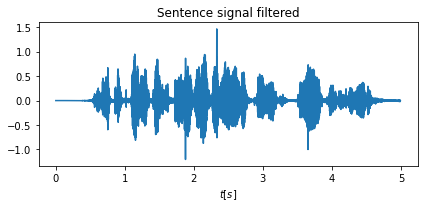

In [30]:
sentence_filtered = lfilter(np.abs(impulse_response), 1, sentence_off)
tone_filtered = lfilter(np.abs(impulse_response), 1, tone_off)

plt.figure(figsize=(6,3))
plt.plot(np.arange(sentence_filtered.size)/fs_sentence_off, sentence_filtered, label="filtered")
plt.gca().set_xlabel('$t [s]$')
plt.gca().set_title('Sentence signal filtered')
plt.tight_layout()

In [31]:
hamming_sentence_filtered = lfilter(np.abs(hamming_impulse_response), 1, sentence_off)
hamming_tone_filtered = lfilter(np.abs(hamming_impulse_response), 1, tone_off)

In [32]:
plt.figure(figsize=(10,4))

plt.plot(np.arange(sentence_filtered.size)/fs_sentence_off, sentence_filtered, label="filtered")
#plt.plot(np.arange(sentence_on.size)/fs_sentence_on, sentence_on, label="mask_on")
plt.plot(np.arange(sentence_off.size)/fs_sentence_off, sentence_off, label="mask_off")
plt.legend()

plt.gca().set_xlabel('$t [s]$')
plt.gca().set_title('Sentence signal: mask off and filtered')
plt.tight_layout()

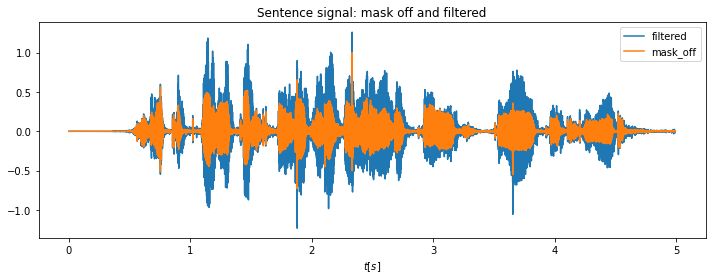

In [33]:
plt.figure(figsize=(10,4))

plt.plot(np.arange(hamming_sentence_filtered.size)/fs_sentence_off, hamming_sentence_filtered, label="filtered")
#plt.plot(np.arange(sentence_on.size)/fs_sentence_on, sentence_on, label="mask_on")
plt.plot(np.arange(sentence_off.size)/fs_sentence_off, sentence_off, label="mask_off")
plt.legend()

plt.gca().set_xlabel('$t [s]$')
plt.gca().set_title('Sentence signal: mask off and filtered')
plt.tight_layout()

In [34]:
IPython.display.display(IPython.display.Audio(sentence_filtered, rate=16000))
IPython.display.display(IPython.display.Audio(hamming_sentence_filtered, rate=16000))
IPython.display.display(IPython.display.Audio(sentence_off, rate=16000))
IPython.display.display(IPython.display.Audio(sentence_on, rate=16000))

In [35]:
IPython.display.display(IPython.display.Audio(tone_filtered, rate=16000))
IPython.display.display(IPython.display.Audio(hamming_tone_filtered, rate=16000))
IPython.display.display(IPython.display.Audio(tone_off, rate=16000))
IPython.display.display(IPython.display.Audio(tone_on, rate=16000))

plt.figure(figsize=(10,4))

plt.plot(np.arange(16000)/16000, tone_filtered, label="filtered")
plt.plot(np.arange(16000)/16000, tone_off, label="mask_off")
#plt.plot(np.arange(16000)/16000, tone_on, label="mask_on")
#plt.plot(np.arange(16000)/16000, tone_filtered, label="filtered")
plt.legend()

plt.gca().set_xlabel('$t [s]$')
plt.gca().set_title('Tone signal: mask off and filtered')
plt.tight_layout()

plt.figure(figsize=(6,3))
plt.plot(np.arange(tone_filtered.size)/16000, tone_filtered, label="filtered")

plt.gca().set_xlabel('$t [s]$')
plt.gca().set_title('Tone signal filtered')
plt.tight_layout()

In [36]:
tone_on_phase = []
for i in range(99):
    tone_on_phase.append(tone_on[i*160 : i*160+400]) # [i*0.01*16000 : (i*0.01+0.025)*16000]

tone_off_phase = []
for i in range(99):
    tone_off_phase.append(tone_off[i*160 : i*160+400]) # [i*0.01*16000 : (i*0.01+0.025)*16000]

plt.figure(figsize=(13,3))
plt.plot(tone_on_phase[5], label='mask_on')
plt.plot(tone_off_phase[5], label='mask_off')
plt.legend()

plt.gca().set_xlabel('$t [ms]$')
plt.gca().set_title('Sample #5: mask on and off')
plt.tight_layout()

In [37]:
clipping_mask_off = []
treshold = 0.63
treshold_off_max = np.abs(tone_off.max()) * treshold
for i in range(98):
    tone_off_clip = []
    for j in range(400):
        if tone_off_phase[i][j] > treshold_off_max:
            tone_off_clip.append(1.0)
        elif tone_off_phase[i][j] < -treshold_off_max:
            tone_off_clip.append(-1.0)
        else:
            tone_off_clip.append(0.0)
    clipping_mask_off.append(np.array(tone_off_clip))
    
clipping_mask_on = []
treshold_on_max = np.abs(tone_on.max()) * treshold
for i in range(98):
    tone_on_clip = []
    for j in range(400):
        if tone_on_phase[i][j] > treshold_on_max:
            tone_on_clip.append(1.0)
        elif tone_on_phase[i][j] < -treshold_on_max:
            tone_on_clip.append(-1.0)
        else:
            tone_on_clip.append(0.0)
    clipping_mask_on.append(np.array(tone_on_clip))

plt.figure(figsize=(10,4))
plt.plot(clipping_mask_off[5])

plt.gca().set_xlabel('$frames$')
plt.gca().set_title('Lags')
plt.tight_layout()

plt.figure(figsize=(10,4))
plt.plot(clipping_mask_on[5])

plt.gca().set_xlabel('$frames$')
plt.gca().set_title('Lags')
plt.tight_layout()

In [38]:
cor_on_off = []

for j in range(98):
    frame_arr = []
    for lag in range(400):
        coef = 0
        for i in range(400-1-lag):
            coef += clipping_mask_on[j][i]*clipping_mask_off[j][i+lag]
        frame_arr.append(coef)
    cor_on_off.append(np.array(frame_arr))

cor_on_off = np.array(cor_on_off)

lags_mask_on_off = []
for frame in cor_on_off:
    lags_mask_on_off.append(np.argmax(frame[15:]))

lags_mask_on_off = np.array(lags_mask_on_off)

cor_off_on = []

for j in range(98):
    frame_arr = []
    for lag in range(400):
        coef = 0
        for i in range(400-1-lag):
            coef += clipping_mask_off[j][i]*clipping_mask_on[j][i+lag]
        frame_arr.append(coef)
    cor_off_on.append(np.array(frame_arr))

cor_off_on = np.array(cor_off_on)

lags_mask_off_on = []
for frame in cor_off_on:
    lags_mask_off_on.append(np.argmax(frame[15:]))
    
lags_mask_off_on = np.array(lags_mask_off_on)



print(lags_mask_off_on.argmax())
print(lags_mask_on_off.argmax())

shifts = lags_mask_off_on + lags_mask_on_off
plt.figure(figsize=(10,4))
plt.plot(shifts)

plt.gca().set_xlabel('$frames$')
plt.gca().set_title('Lags')
plt.tight_layout()

In [39]:
np_cor_on_off = []
for i in range(98):
    np_cor_on_off.append(np.correlate(clipping_mask_on[i], clipping_mask_off[i]))
np_cor_on_off = np.array(np_cor_on_off)

np_cor_off_on = []
for i in range(98):
    np_cor_off_on.append(np.correlate(clipping_mask_off[i], clipping_mask_on[i]))
np_cor_off_on = np.array(np_cor_off_on)

plt.figure(figsize=(10,4))
plt.plot(lags_mask_on_off, label='on_off')
plt.plot(lags_mask_off_on, label='off_on')
plt.legend()

plt.gca().set_xlabel('$frames$')
plt.gca().set_title('Phase shifts')
plt.tight_layout()

plt.figure(figsize=(10,4))
plt.plot(np_cor_on_off, label='on_off')
#plt.plot(np_cor_off_on, label='off_on')
#plt.legend()

plt.gca().set_xlabel('$frames$')
plt.gca().set_title('Phase shifts')
plt.tight_layout()

In [40]:
shifted_on = []
shifted_off = []
for i in range(98):
    shifted_on.append(tone_on_phase[i][np_cor_off_on.argmax():(np_cor_off_on.argmax() + 320)])
    shifted_off.append(tone_off_phase[i][:320])
    
shifted_on = np.array(shifted_on)
shifted_off = np.array(shifted_off)
    
plt.figure(figsize=(8,3))
plt.plot(np.arange(320)/16000, shifted_on[5], label='mask on')
plt.plot(np.arange(320)/16000, shifted_off[5], label='mask off')
plt.legend()

plt.gca().set_xlabel('$t [ms]$')
plt.gca().set_title('Sample #5: mask on and off')
plt.tight_layout()

In [41]:
shift_dft_on = []
for frame in shifted_on:
    shift_dft_on.append(np.fft.fft(frame, n=1024))
shift_dft_on = np.array(shift_dft_on)

shift_dft_improved_on = 20 * np.log10(np.abs(shift_dft_on)+1e-20)
plt.figure(figsize=(8,4))
plt.imshow(shift_dft_improved_on[:,:512].transpose(), aspect='auto', extent=[0, 1, 0, 8000], origin='lower')
plt.gca().set_title('Spectrogram: mask on')
plt.gca().set_xlabel('t [s]')
plt.gca().set_ylabel('Frequency [Hz]')
plt.colorbar().set_label('Spectral power density [dB]', rotation=270, labelpad=15)
plt.tight_layout()

In [42]:
shift_dft_off = []
for frame in shifted_off:
    shift_dft_off.append(np.fft.fft(frame, n=1024))
shift_dft_off = np.array(shift_dft_off)

shift_dft_improved_off = 20 * np.log10(np.abs(shift_dft_off)+1e-20)
plt.figure(figsize=(8,4))
plt.imshow(shift_dft_improved_off[:,:512].transpose(), aspect='auto', extent=[0, 1, 0, 8000], origin='lower')
plt.gca().set_title('Spectrogram: mask off')
plt.gca().set_xlabel('t [s]')
plt.gca().set_ylabel('Frequency [Hz]')
plt.colorbar().set_label('Spectral power density [dB]', rotation=270, labelpad=15)
plt.tight_layout()

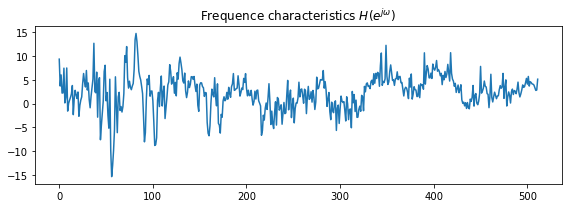

In [43]:
shift_freq_charact = []
for i in range(98):
    freq = shift_dft_on[i, :512]/shift_dft_off[i, :512]
    shift_freq_charact.append(np.array(freq))
shift_freq_chraract = np.array(shift_freq_charact)
shift_freq_medium = np.empty(512)
shift_freq_medium = np.mean(np.abs(shift_freq_charact), axis=0)

shift_freq_medium_improved = 20 * np.log10(np.abs(shift_freq_medium)+1e-20)

plt.figure(figsize=(8,3))
plt.plot(shift_freq_medium_improved)
plt.gca().set_title('Frequence characteristics $H(e^{j\omega})$')
plt.tight_layout()

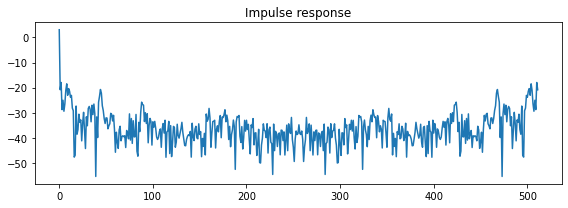

In [44]:
shift_impulse_response = np.fft.ifft(shift_freq_medium)

plt.figure(figsize=(8,3))
plt.plot(20 * np.log10(np.abs(shift_impulse_response)+1e-20))
plt.gca().set_title('Impulse response')
plt.tight_layout()

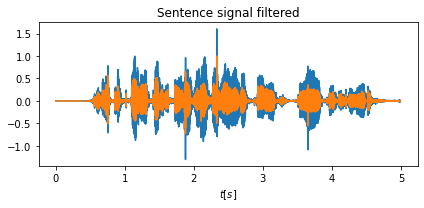

In [45]:
shift_sentence_filtered = lfilter(np.abs(shift_impulse_response), 1, sentence_off)
shift_tone_filtered = lfilter(np.abs(shift_impulse_response), 1, tone_off)

plt.figure(figsize=(6,3))
plt.plot(np.arange(shift_sentence_filtered.size)/fs_sentence_off, shift_sentence_filtered, label="filtered")
plt.plot(np.arange(sentence_off.size)/fs_sentence_off, sentence_off, label="mask_off")
plt.gca().set_xlabel('$t [s]$')
plt.gca().set_title('Sentence signal filtered')
plt.tight_layout()

In [46]:
IPython.display.display(IPython.display.Audio(sentence_filtered, rate=16000))
IPython.display.display(IPython.display.Audio(shift_sentence_filtered, rate=16000))
# IPython.display.display(IPython.display.Audio(sentence_off, rate=16000))
# IPython.display.display(IPython.display.Audio(sentence_on, rate=16000))

In [47]:
IPython.display.display(IPython.display.Audio(tone_filtered, rate=16000))
IPython.display.display(IPython.display.Audio(shift_tone_filtered, rate=16000))
# IPython.display.display(IPython.display.Audio(tone_off, rate=16000))
# IPython.display.display(IPython.display.Audio(tone_on, rate=16000))